In [1]:
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
unneeded_data = ['Place_of_isolation','Patient_In','Patient_out']
catigorical_data=['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type']
labels = ['Severeity','Outcome']
droped_col = unneeded_data+catigorical_data+labels

In [3]:
df = pd.read_csv("Covid-19_dataset.csv",header=1)



df['is_Male'] = pd.get_dummies(df['Gender'])['MALE']#one hot encoding gender so male = #1 and female = 0

blood_types = pd.get_dummies(df['Blood_Group']).columns

#     #All 
blood_group_columns = pd.get_dummies(df[['Blood_Group','CONTROL_blood_group']]).columns
df = pd.concat([df, pd.get_dummies(df[['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type']])], axis=1)
df = df.drop(['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)


    #NO Blood control group
# blood_group_columns = pd.get_dummies(df['Blood_Group']).columns
# temp = []
# for g in blood_group_columns:
#     temp.append("Blood_Group_"+g)
# blood_group_columns = temp
# df = df.drop("CONTROL_blood_group",axis=1)
# df = pd.concat([df, pd.get_dummies(df[['Blood_Group','Risk_Factor','Infection_type']])], axis=1)
# df = df.drop(['Blood_Group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)




columns = df.columns



# getting rid of blank values
print("before",df.shape)
for name in columns:
    df = df[df[name] != " "]
    df = df.dropna()
    
label_Severity = df['Severeity'] #Severeity vs Outcome
label_Outcome = df['Outcome']
df = df.drop(['Severeity','Outcome'],axis=1)


df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))#strings to numeric
all_columns = df.columns
# df = df.reset_index()

print("after",df.shape)


df_no_blood_data = copy.deepcopy(df.drop(blood_group_columns,axis=1))



before (5668, 57)
after (5641, 55)


In [4]:
df

,Age,Incubation period (days),Fever,Chills,Cough,Dyspnea,Anosmia_Ageusia,Loss_of_appetite,Asthenia,Headache,...,Risk_Factor_DMCKD,Risk_Factor_DMHT,Risk_Factor_HT,Risk_Factor_HT,Risk_Factor_NONE,Risk_Factor_RF,Infection_type_Asymptomatic,Infection_type_Asymtomatic,Infection_type_Symptomatic,Infection_type_Symtomatic
0,61.0,14,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,49.0,28,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,88.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,56.0,17,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
4,41.0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,65.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5664,32.0,7,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
5665,28.0,4,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5666,40.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df_no_blood_data

,Age,Incubation period (days),Fever,Chills,Cough,Dyspnea,Anosmia_Ageusia,Loss_of_appetite,Asthenia,Headache,...,Risk_Factor_DMCKD,Risk_Factor_DMHT,Risk_Factor_HT,Risk_Factor_HT,Risk_Factor_NONE,Risk_Factor_RF,Infection_type_Asymptomatic,Infection_type_Asymtomatic,Infection_type_Symptomatic,Infection_type_Symtomatic
0,61.0,14,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,49.0,28,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,88.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,56.0,17,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
4,41.0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,65.0,14,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5664,32.0,7,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
5665,28.0,4,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5666,40.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [6]:
def get_Auc(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    # accuracy_score(y_Test,predict)
    pred_prob = model.predict_proba(X_test)
    classes=model.classes_


    all_auc = []
    AUC_set = []

    for class_index in range(len(classes)):
        labelProb = pred_prob[:,class_index]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, labelProb, pos_label=classes[class_index])

        AUC = metrics.auc(fpr, tpr)



        all_auc.append([classes[class_index],fpr,tpr,AUC])

    for label in all_auc:
        label_name = label[0]
        fpr = label[1]
        tpr = label[2]
        AUC = label[3]
        AUC_set.append((label_name,AUC))


        plt.plot(fpr, tpr, lw=2, label= str.title(label_name)+' Curve (area = %0.5f)' % AUC)

        plt.xlim([-0.005, 1.005])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title('Receiver operating characteristic')
    return AUC_set

In [7]:
def compare_Blood_or_noBlood(model,y,blacklist_features):
    
    X_blood = df[[a for a in df.columns if a not in blacklist_features]]
    X_NoBlood = df_no_blood_data[[a for a in df_no_blood_data.columns if a not in blacklist_features]]
    
    AUC_WB = get_Auc(copy.deepcopy(model),X_blood,y)
    print("Area Under Curve With Blood: \t",AUC_WB)
    
    AUC_WOB = get_Auc(copy.deepcopy(model),X_NoBlood,y)
    print("Area Under Curve Without Blood: \t",AUC_WOB)
    
    print("With Blood - Without")
    
#     for i in range(4):
#         print(AUC_WB[i][0],"\tArea Under Curve With Blood: \t",AUC_WB[i][1])
#         print(AUC_WOB[i][0],"\tArea Under Curve Without Blood: \t",AUC_WOB[i][1])
#         print(AUC_WB[i][0],"\tDifferance:\t",AUC_WB[i][1] - AUC_WOB[i][1])
        
    for i in range(4):
        print("{:<10} {:<30} {:<30} {:<20}".format(
            AUC_WB[i][0],
            "\nArea Under Curve With Blood: " + str(AUC_WB[i][1]),
            "\nArea Under Curve Without Blood: " + str(AUC_WOB[i][1]),
            "\nDifference: " + str(AUC_WB[i][1] - AUC_WOB[i][1])
        ))

    
    
#     plt.plot(fpt_WB, tpr_WB,label="With Blood")
#     plt.plot(fpt_WOB, tpr_WOB,label="Without Blood")
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.figlegend()
#     plt.show()
    
#     return AUC_WOB,AUC_WB
    
    

In [8]:
blacklist = []

Logistic Regression
Area Under Curve With Blood: 	 [('Critical', 0.9966914805624483), ('Mild', 0.7033198654771358), ('Moderate', 0.7125425170068027), ('Severe', 0.9951145552560646)]
Area Under Curve Without Blood: 	 [('Critical', 0.9972429004687069), ('Mild', 0.6499213726314478), ('Moderate', 0.6622301094350783), ('Severe', 0.9958445642407907)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.9966914805624483 
Area Under Curve Without Blood: 0.9972429004687069 
Difference: -0.0005514199062586211
Mild       
Area Under Curve With Blood: 0.7033198654771358 
Area Under Curve Without Blood: 0.6499213726314478 
Difference: 0.053398492845687984
Moderate   
Area Under Curve With Blood: 0.7125425170068027 
Area Under Curve Without Blood: 0.6622301094350783 
Difference: 0.050312407571724393
Severe     
Area Under Curve With Blood: 0.9951145552560646 
Area Under Curve Without Blood: 0.9958445642407907 
Difference: -0.0007300089847260827


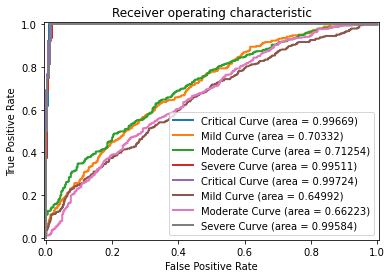

In [9]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Severity,blacklist)

KNeighbors Classifier
Area Under Curve With Blood: 	 [('Critical', 0.9564722911497106), ('Mild', 0.6059289706821119), ('Moderate', 0.6198868677905944), ('Severe', 0.9903694968553459)]
Area Under Curve Without Blood: 	 [('Critical', 0.955300523848911), ('Mild', 0.5819398383857256), ('Moderate', 0.5980072463768116), ('Severe', 0.9914925876010782)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.9564722911497106 
Area Under Curve Without Blood: 0.955300523848911 
Difference: 0.0011717673007995977
Mild       
Area Under Curve With Blood: 0.6059289706821119 
Area Under Curve Without Blood: 0.5819398383857256 
Difference: 0.02398913229638633
Moderate   
Area Under Curve With Blood: 0.6198868677905944 
Area Under Curve Without Blood: 0.5980072463768116 
Difference: 0.021879621413782857
Severe     
Area Under Curve With Blood: 0.9903694968553459 
Area Under Curve Without Blood: 0.9914925876010782 
Difference: -0.001123090745732247


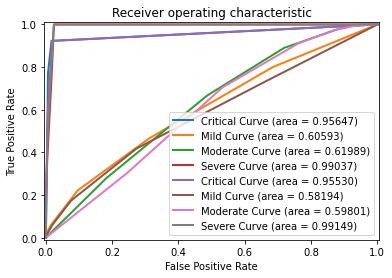

In [10]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Severity,blacklist)

Decision Tree
Area Under Curve With Blood: 	 [('Critical', 0.805004135649297), ('Mild', 0.564412163108973), ('Moderate', 0.58171768707483), ('Severe', 0.7160545822102425)]
Area Under Curve Without Blood: 	 [('Critical', 0.7656465398400882), ('Mild', 0.5628746477338191), ('Moderate', 0.5780760130139012), ('Severe', 0.7785545822102425)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.805004135649297 
Area Under Curve Without Blood: 0.7656465398400882 
Difference: 0.03935759580920872
Mild       
Area Under Curve With Blood: 0.564412163108973 
Area Under Curve Without Blood: 0.5628746477338191 
Difference: 0.0015375153751538972
Moderate   
Area Under Curve With Blood: 0.58171768707483 
Area Under Curve Without Blood: 0.5780760130139012 
Difference: 0.0036416740609287457
Severe     
Area Under Curve With Blood: 0.7160545822102425 
Area Under Curve Without Blood: 0.7785545822102425 
Difference: -0.0625


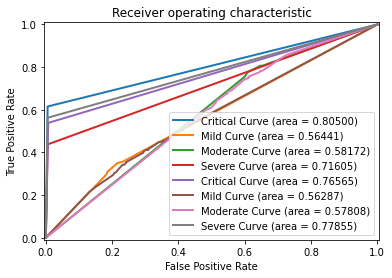

In [11]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Severity,blacklist)

Random Forest Classifier
Area Under Curve With Blood: 	 [('Critical', 0.9962779156327544), ('Mild', 0.6630252853161442), ('Moderate', 0.6761350192250812), ('Severe', 0.9957884097035041)]
Area Under Curve Without Blood: 	 [('Critical', 0.958023159636063), ('Mild', 0.6052224920983387), ('Moderate', 0.6209738243123336), ('Severe', 0.9946933962264151)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.9962779156327544 
Area Under Curve Without Blood: 0.958023159636063 
Difference: 0.03825475599669137
Mild       
Area Under Curve With Blood: 0.6630252853161442 
Area Under Curve Without Blood: 0.6052224920983387 
Difference: 0.05780279321780557
Moderate   
Area Under Curve With Blood: 0.6761350192250812 
Area Under Curve Without Blood: 0.6209738243123336 
Difference: 0.055161194912747624
Severe     
Area Under Curve With Blood: 0.9957884097035041 
Area Under Curve Without Blood: 0.9946933962264151 
Difference: 0.0010950134770890685


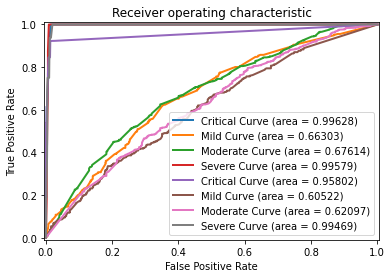

In [12]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severity,blacklist)

Ada Boost Classifier
Area Under Curve With Blood: 	 [('Critical', 0.9924869037772264), ('Mild', 0.5227552275522755), ('Moderate', 0.5279872818692695), ('Severe', 0.3156446540880503)]
Area Under Curve Without Blood: 	 [('Critical', 0.9924869037772264), ('Mild', 0.5227552275522755), ('Moderate', 0.5279872818692695), ('Severe', 0.3156446540880503)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.9924869037772264 
Area Under Curve Without Blood: 0.9924869037772264 
Difference: 0.0    
Mild       
Area Under Curve With Blood: 0.5227552275522755 
Area Under Curve Without Blood: 0.5227552275522755 
Difference: 0.0    
Moderate   
Area Under Curve With Blood: 0.5279872818692695 
Area Under Curve Without Blood: 0.5279872818692695 
Difference: 0.0    
Severe     
Area Under Curve With Blood: 0.3156446540880503 
Area Under Curve Without Blood: 0.3156446540880503 
Difference: 0.0    


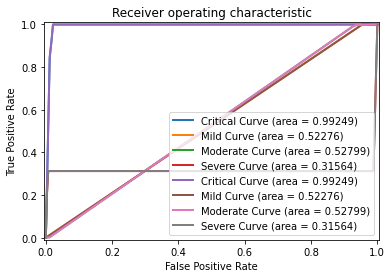

In [13]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Severity,blacklist)

## without the features from First Itteration of Boruta 

In [14]:
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_HT', 'Risk_Factor_NONE']

Logistic Regression
Area Under Curve With Blood: 	 [('Critical', 0.8156878963330576), ('Mild', 0.6524066981176141), ('Moderate', 0.6558858325939071), ('Severe', 0.8515274034141957)]
Area Under Curve Without Blood: 	 [('Critical', 0.8076233802040254), ('Mild', 0.5937222663365873), ('Moderate', 0.5950421472937001), ('Severe', 0.9075977088948787)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.8156878963330576 
Area Under Curve Without Blood: 0.8076233802040254 
Difference: 0.008064516129032251
Mild       
Area Under Curve With Blood: 0.6524066981176141 
Area Under Curve Without Blood: 0.5937222663365873 
Difference: 0.05868443178102678
Moderate   
Area Under Curve With Blood: 0.6558858325939071 
Area Under Curve Without Blood: 0.5950421472937001 
Difference: 0.06084368530020701
Severe     
Area Under Curve With Blood: 0.8515274034141957 
Area Under Curve Without Blood: 0.9075977088948787 
Difference: -0.056070305480682925


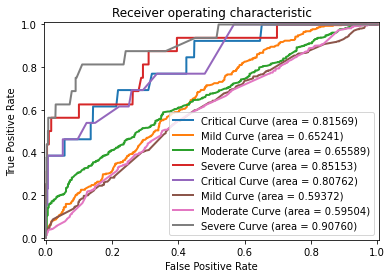

In [15]:

print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Severity,blacklist)

KNeighbors Classifier
Area Under Curve With Blood: 	 [('Critical', 0.5657223600771988), ('Mild', 0.5511564451087549), ('Moderate', 0.560431455190772), ('Severe', 0.5705020215633423)]
Area Under Curve Without Blood: 	 [('Critical', 0.5661703887510339), ('Mild', 0.547464461986392), ('Moderate', 0.5330634427684117), ('Severe', 0.596782345013477)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.5657223600771988 
Area Under Curve Without Blood: 0.5661703887510339 
Difference: -0.00044802867383508804
Mild       
Area Under Curve With Blood: 0.5511564451087549 
Area Under Curve Without Blood: 0.547464461986392 
Difference: 0.003691983122362963
Moderate   
Area Under Curve With Blood: 0.560431455190772 
Area Under Curve Without Blood: 0.5330634427684117 
Difference: 0.02736801242236031
Severe     
Area Under Curve With Blood: 0.5705020215633423 
Area Under Curve Without Blood: 0.596782345013477 
Difference: -0.026280323450134757


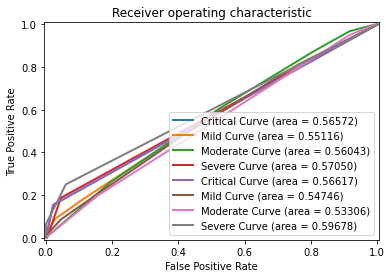

In [16]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Severity,blacklist)

Decision Tree
Area Under Curve With Blood: 	 [('Critical', 0.6415081334436173), ('Mild', 0.5907348155760038), ('Moderate', 0.590881026323573), ('Severe', 0.6990678346810423)]
Area Under Curve Without Blood: 	 [('Critical', 0.5681348221670802), ('Mild', 0.5668293708253538), ('Moderate', 0.5602447500739426), ('Severe', 0.7055817610062893)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.6415081334436173 
Area Under Curve Without Blood: 0.5681348221670802 
Difference: 0.07337331127653712
Mild       
Area Under Curve With Blood: 0.5907348155760038 
Area Under Curve Without Blood: 0.5668293708253538 
Difference: 0.02390544475065004
Moderate   
Area Under Curve With Blood: 0.590881026323573 
Area Under Curve Without Blood: 0.5602447500739426 
Difference: 0.03063627624963039
Severe     
Area Under Curve With Blood: 0.6990678346810423 
Area Under Curve Without Blood: 0.7055817610062893 
Difference: -0.006513926325247055


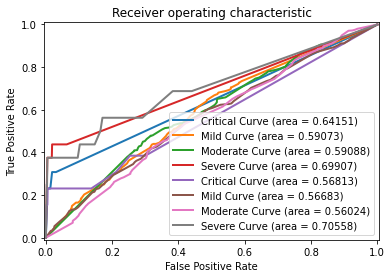

In [17]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Severity,blacklist)

Random Forest Classifier
Area Under Curve With Blood: 	 [('Critical', 0.785394265232975), ('Mild', 0.6201305525713485), ('Moderate', 0.6233862023070098), ('Severe', 0.8071653189577718)]
Area Under Curve Without Blood: 	 [('Critical', 0.7084022608216156), ('Mild', 0.5818230650660937), ('Moderate', 0.5768762939958592), ('Severe', 0.7719283468104222)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.785394265232975 
Area Under Curve Without Blood: 0.7084022608216156 
Difference: 0.07699200441135934
Mild       
Area Under Curve With Blood: 0.6201305525713485 
Area Under Curve Without Blood: 0.5818230650660937 
Difference: 0.03830748750525481
Moderate   
Area Under Curve With Blood: 0.6233862023070098 
Area Under Curve Without Blood: 0.5768762939958592 
Difference: 0.04650990831115065
Severe     
Area Under Curve With Blood: 0.8071653189577718 
Area Under Curve Without Blood: 0.7719283468104222 
Difference: 0.035236972147349555


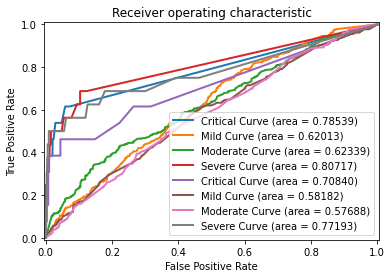

In [18]:

print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severity,blacklist)

Ada Boost Classifier
Area Under Curve With Blood: 	 [('Critical', 0.7880479735318445), ('Mild', 0.5826969187413393), ('Moderate', 0.5482993197278911), ('Severe', 0.758788185085355)]
Area Under Curve Without Blood: 	 [('Critical', 0.7647504824924181), ('Mild', 0.5722457066342815), ('Moderate', 0.5283144779650991), ('Severe', 0.8356356693620844)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.7880479735318445 
Area Under Curve Without Blood: 0.7647504824924181 
Difference: 0.023297491039426466
Mild       
Area Under Curve With Blood: 0.5826969187413393 
Area Under Curve Without Blood: 0.5722457066342815 
Difference: 0.010451212107057795
Moderate   
Area Under Curve With Blood: 0.5482993197278911 
Area Under Curve Without Blood: 0.5283144779650991 
Difference: 0.019984841762792027
Severe     
Area Under Curve With Blood: 0.758788185085355 
Area Under Curve Without Blood: 0.8356356693620844 
Difference: -0.0768474842767295


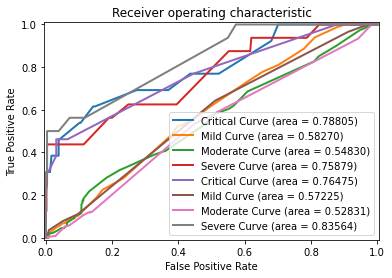

In [19]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Severity,blacklist)

## without the features from First and second Itteration of Boruta 

In [20]:
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_HT', 'Risk_Factor_NONE','Risk_Factor_COPD', 'CONTROL_blood_group_AB+', 'Nausea_vomiting', 'Risk_Factor_DM', 'is_Male', 'Risk_Factor_DMHT', 'Risk_Factor_AT']

Logistic Regression
Area Under Curve With Blood: 	 [('Critical', 0.6930658946787979), ('Mild', 0.634334080682579), ('Moderate', 0.6261498077491866), ('Severe', 0.6486129829290207)]
Area Under Curve Without Blood: 	 [('Critical', 0.6602908740005514), ('Mild', 0.5590736761797999), ('Moderate', 0.5515657349896481), ('Severe', 0.6703728661275832)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.6930658946787979 
Area Under Curve Without Blood: 0.6602908740005514 
Difference: 0.03277502067824645
Mild       
Area Under Curve With Blood: 0.634334080682579 
Area Under Curve Without Blood: 0.5590736761797999 
Difference: 0.07526040450277915
Moderate   
Area Under Curve With Blood: 0.6261498077491866 
Area Under Curve Without Blood: 0.5515657349896481 
Difference: 0.07458407275953849
Severe     
Area Under Curve With Blood: 0.6486129829290207 
Area Under Curve Without Blood: 0.6703728661275832 
Difference: -0.02175988319856248


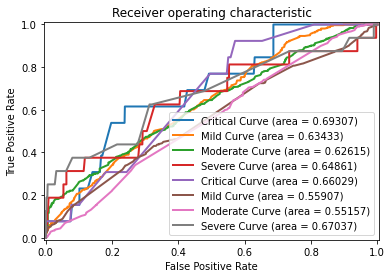

In [21]:

print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Severity,blacklist)


KNeighbors Classifier
Area Under Curve With Blood: 	 [('Critical', 0.5522125723738627), ('Mild', 0.5586552384511188), ('Moderate', 0.5540908754806271), ('Severe', 0.5417228212039532)]
Area Under Curve Without Blood: 	 [('Critical', 0.5710987041632203), ('Mild', 0.5087073972005542), ('Moderate', 0.5120101301390122), ('Severe', 0.5566037735849056)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.5522125723738627 
Area Under Curve Without Blood: 0.5710987041632203 
Difference: -0.018886131789357608
Mild       
Area Under Curve With Blood: 0.5586552384511188 
Area Under Curve Without Blood: 0.5087073972005542 
Difference: 0.049947841250564506
Moderate   
Area Under Curve With Blood: 0.5540908754806271 
Area Under Curve Without Blood: 0.5120101301390122 
Difference: 0.04208074534161488
Severe     
Area Under Curve With Blood: 0.5417228212039532 
Area Under Curve Without Blood: 0.5566037735849056 
Difference: -0.014880952380952439


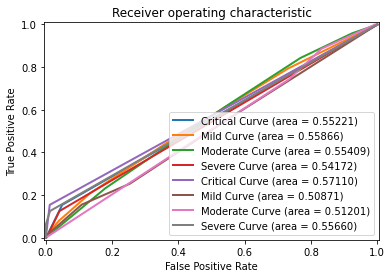

In [22]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Severity,blacklist)

Decision Tree
Area Under Curve With Blood: 	 [('Critical', 0.5905017921146954), ('Mild', 0.5844621420897753), ('Moderate', 0.5816086217095534), ('Severe', 0.5438566936208445)]
Area Under Curve Without Blood: 	 [('Critical', 0.545078577336642), ('Mild', 0.5182691858564155), ('Moderate', 0.5049005471753919), ('Severe', 0.5483490566037736)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.5905017921146954 
Area Under Curve Without Blood: 0.545078577336642 
Difference: 0.045423214778053445
Mild       
Area Under Curve With Blood: 0.5844621420897753 
Area Under Curve Without Blood: 0.5182691858564155 
Difference: 0.06619295623335986
Moderate   
Area Under Curve With Blood: 0.5816086217095534 
Area Under Curve Without Blood: 0.5049005471753919 
Difference: 0.07670807453416151
Severe     
Area Under Curve With Blood: 0.5438566936208445 
Area Under Curve Without Blood: 0.5483490566037736 
Difference: -0.004492362982929099


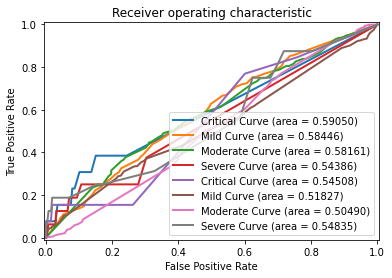

In [23]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Severity,blacklist)

Random Forest Classifier
Area Under Curve With Blood: 	 [('Critical', 0.6124551971326165), ('Mild', 0.5972780139193797), ('Moderate', 0.5963102632357291), ('Severe', 0.6572046271338724)]
Area Under Curve Without Blood: 	 [('Critical', 0.5412531017369727), ('Mild', 0.529101857474271), ('Moderate', 0.5276101745045845), ('Severe', 0.7102145103324347)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.6124551971326165 
Area Under Curve Without Blood: 0.5412531017369727 
Difference: 0.07120209539564382
Mild       
Area Under Curve With Blood: 0.5972780139193797 
Area Under Curve Without Blood: 0.529101857474271 
Difference: 0.06817615644510877
Moderate   
Area Under Curve With Blood: 0.5963102632357291 
Area Under Curve Without Blood: 0.5276101745045845 
Difference: 0.06870008873114464
Severe     
Area Under Curve With Blood: 0.6572046271338724 
Area Under Curve Without Blood: 0.7102145103324347 
Difference: -0.05300988319856226


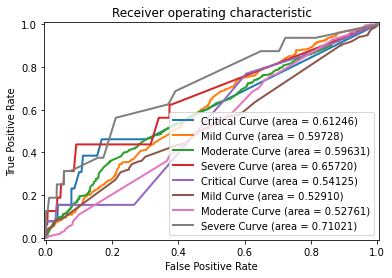

In [24]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severity,blacklist)

Ada Boost Classifier
Area Under Curve With Blood: 	 [('Critical', 0.6886545354287289), ('Mild', 0.5376632880252853), ('Moderate', 0.47853630582667844), ('Severe', 0.5868429919137467)]
Area Under Curve Without Blood: 	 [('Critical', 0.6169699476151089), ('Mild', 0.5359583975586591), ('Moderate', 0.4806122448979591), ('Severe', 0.6173629829290206)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.6886545354287289 
Area Under Curve Without Blood: 0.6169699476151089 
Difference: 0.07168458781361997
Mild       
Area Under Curve With Blood: 0.5376632880252853 
Area Under Curve Without Blood: 0.5359583975586591 
Difference: 0.001704890466626141
Moderate   
Area Under Curve With Blood: 0.47853630582667844 
Area Under Curve Without Blood: 0.4806122448979591 
Difference: -0.0020759390712806747
Severe     
Area Under Curve With Blood: 0.5868429919137467 
Area Under Curve Without Blood: 0.6173629829290206 
Difference: -0.030519991015273917


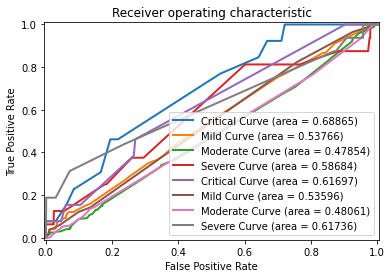

In [25]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Severity,blacklist)

## without the features from all 3 Itteration of Boruta 

In [26]:
blacklist = ['Age', ' Incubation period (days)', 'Cyanosis', 'Risk_Factor_HT', 'Risk_Factor_NONE','Risk_Factor_COPD', 'CONTROL_blood_group_AB+', 'Nausea_vomiting', 'Risk_Factor_DM', 'is_Male', 'Risk_Factor_DMHT', 'Risk_Factor_AT','Risk_Factor_CA', 'CONTROL_blood_group_B+', 'Risk_Factor_CKD', 'Blood_Group_A+', 'Risk_Factor_AP']

Logistic Regression
Area Under Curve With Blood: 	 [('Critical', 0.6734560242624759), ('Mild', 0.6019878711445342), ('Moderate', 0.596389751552795), ('Severe', 0.634068957771788)]
Area Under Curve Without Blood: 	 [('Critical', 0.6502274607113316), ('Mild', 0.5597490152116711), ('Moderate', 0.5508207630878439), ('Severe', 0.6469002695417789)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.6734560242624759 
Area Under Curve Without Blood: 0.6502274607113316 
Difference: 0.02322856355114422
Mild       
Area Under Curve With Blood: 0.6019878711445342 
Area Under Curve Without Blood: 0.5597490152116711 
Difference: 0.04223885593286314
Moderate   
Area Under Curve With Blood: 0.596389751552795 
Area Under Curve Without Blood: 0.5508207630878439 
Difference: 0.045568988464951166
Severe     
Area Under Curve With Blood: 0.634068957771788 
Area Under Curve Without Blood: 0.6469002695417789 
Difference: -0.012831311769990972


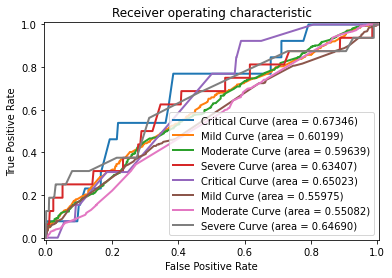

In [27]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
compare_Blood_or_noBlood(my_logreg,label_Severity,blacklist)

KNeighbors Classifier
Area Under Curve With Blood: 	 [('Critical', 0.47401433691756273), ('Mild', 0.549504102635963), ('Moderate', 0.5571687370600414), ('Severe', 0.5395889487870619)]
Area Under Curve Without Blood: 	 [('Critical', 0.5165081334436173), ('Mild', 0.5679756955797406), ('Moderate', 0.5695707630878438), ('Severe', 0.49101527403414197)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.47401433691756273 
Area Under Curve Without Blood: 0.5165081334436173 
Difference: -0.04249379652605462
Mild       
Area Under Curve With Blood: 0.549504102635963 
Area Under Curve Without Blood: 0.5679756955797406 
Difference: -0.018471592943777537
Moderate   
Area Under Curve With Blood: 0.5571687370600414 
Area Under Curve Without Blood: 0.5695707630878438 
Difference: -0.012402026027802382
Severe     
Area Under Curve With Blood: 0.5395889487870619 
Area Under Curve Without Blood: 0.49101527403414197 
Difference: 0.048573674752919904


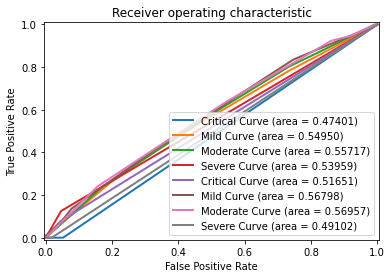

In [28]:
print("KNeighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=5)
compare_Blood_or_noBlood(knn,label_Severity,blacklist)


Decision Tree
Area Under Curve With Blood: 	 [('Critical', 0.5377722635787151), ('Mild', 0.5518804396904728), ('Moderate', 0.5578693433895298), ('Severe', 0.6129267744833782)]
Area Under Curve Without Blood: 	 [('Critical', 0.5308795147504825), ('Mild', 0.5105874476466284), ('Moderate', 0.5053423543330376), ('Severe', 0.5286949685534591)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.5377722635787151 
Area Under Curve Without Blood: 0.5308795147504825 
Difference: 0.006892748828232653
Mild       
Area Under Curve With Blood: 0.5518804396904728 
Area Under Curve Without Blood: 0.5105874476466284 
Difference: 0.0412929920438444
Moderate   
Area Under Curve With Blood: 0.5578693433895298 
Area Under Curve Without Blood: 0.5053423543330376 
Difference: 0.05252698905649211
Severe     
Area Under Curve With Blood: 0.6129267744833782 
Area Under Curve Without Blood: 0.5286949685534591 
Difference: 0.08423180592991908


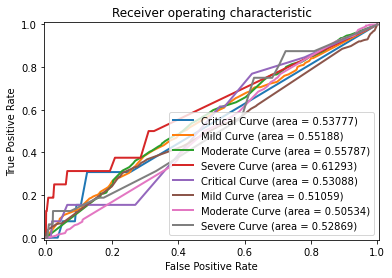

In [29]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
compare_Blood_or_noBlood(my_DecisionTree,label_Severity,blacklist)

Random Forest Classifier
Area Under Curve With Blood: 	 [('Critical', 0.57671629445823), ('Mild', 0.5683805097544646), ('Moderate', 0.5758725229222124), ('Severe', 0.6477706648697215)]
Area Under Curve Without Blood: 	 [('Critical', 0.5205748552522745), ('Mild', 0.5239541003004967), ('Moderate', 0.5243012422360248), ('Severe', 0.6669474393530997)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.57671629445823 
Area Under Curve Without Blood: 0.5205748552522745 
Difference: 0.05614143920595549
Mild       
Area Under Curve With Blood: 0.5683805097544646 
Area Under Curve Without Blood: 0.5239541003004967 
Difference: 0.04442640945396792
Moderate   
Area Under Curve With Blood: 0.5758725229222124 
Area Under Curve Without Blood: 0.5243012422360248 
Difference: 0.05157128068618755
Severe     
Area Under Curve With Blood: 0.6477706648697215 
Area Under Curve Without Blood: 0.6669474393530997 
Difference: -0.01917677448337829


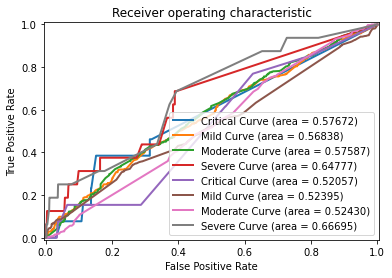

In [30]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
compare_Blood_or_noBlood(my_RandomForest,label_Severity,blacklist)

Ada Boost Classifier
Area Under Curve With Blood: 	 [('Critical', 0.5846429556106976), ('Mild', 0.5501697105578651), ('Moderate', 0.5411435226264419), ('Severe', 0.6633816262353998)]
Area Under Curve Without Blood: 	 [('Critical', 0.6704921422663358), ('Mild', 0.5437335544241519), ('Moderate', 0.4900713546288081), ('Severe', 0.715717654986523)]
With Blood - Without
Critical   
Area Under Curve With Blood: 0.5846429556106976 
Area Under Curve Without Blood: 0.6704921422663358 
Difference: -0.08584918665563823
Mild       
Area Under Curve With Blood: 0.5501697105578651 
Area Under Curve Without Blood: 0.5437335544241519 
Difference: 0.006436156133713178
Moderate   
Area Under Curve With Blood: 0.5411435226264419 
Area Under Curve Without Blood: 0.4900713546288081 
Difference: 0.051072167997633866
Severe     
Area Under Curve With Blood: 0.6633816262353998 
Area Under Curve Without Blood: 0.715717654986523 
Difference: -0.0523360287511232


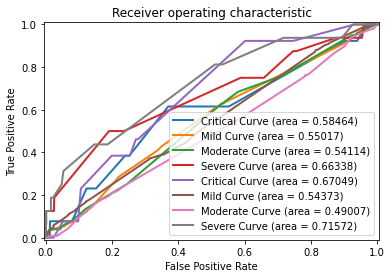

In [31]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
compare_Blood_or_noBlood(my_AdaBoost,label_Severity,blacklist)